# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 11</font>

## Download: http://github.com/dsacademybr

## Prevendo a Ocorrência de Diabetes

In [ ]:
from IPython.display import Image
Image('Workflow.png')

## Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [ ]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline             

In [ ]:
# Carregando o dataset
df = pd.read_csv("pima-data.csv")   

In [ ]:
# Verificando o formato dos dados
df.shape

In [ ]:
# Verificando as primeiras linhas do dataset
df.head(5)

In [ ]:
# Verificando as últimas linhas do dataset
df.tail(5)

In [ ]:
# Verificando se existem valores nulos
df.isnull().values.any()

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

In [ ]:
# Criando o gráfico
plot_corr(df)

In [ ]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

In [ ]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [ ]:
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [ ]:
# Verificando as primeiras linhas do dataset
df.head(5)

In [ ]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

## Spliting

70% para dados de treino e 30% para dados de teste

In [ ]:
from IPython.display import Image
Image('Treinamento.png')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [ ]:
# Variável a ser prevista
atrib_prev = ['diabetes']

In [ ]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [ ]:
X

In [ ]:
Y

In [ ]:
# Definindo a taxa de split
split_test_size = 0.30

In [ ]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

In [ ]:
X_treino

## Verificando o Split

In [ ]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

## Valores Missing Ocultos



In [ ]:
# Verificando se existem valores nulos
df.isnull().values.any()

In [ ]:
df.head(5)

In [ ]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

## Tratando Dados Missing - Impute 
Substituindo os valores iguais a zero, pela média dos dados

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
# Criando objeto
preenche_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [ ]:
X_treino

## 50 a 80% do tempo de trabalho de um Cientista de Dados é usado na preparação dos dados.

## Construindo e treinando o modelo

In [ ]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

## Verificando a exatidão no modelo nos dados de treino

In [ ]:
from sklearn import metrics

In [ ]:
nb_predict_train = modelo_v1.predict(X_treino)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

## Verificando a exatidão no modelo nos dados de teste

In [ ]:
nb_predict_test = modelo_v1.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

## Métricas

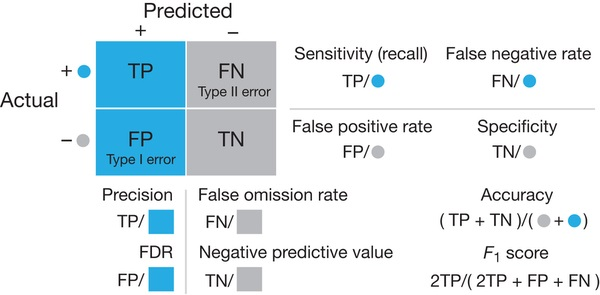

In [1]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

# Otimizando o modelo com RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

In [ ]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 0.7359
# Modelo usando algoritmo Random Forest       = 0.7100
# Modelo usando algoritmo Regressão Logística = 0.7446

## Fazendo Previsões Com o Modelo Treinado

In [ ]:
import pickle

In [ ]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [ ]:
X_teste

In [ ]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>